# <b>IFI 8420 - Final Project</b>
### Team 5
Mina Carbajal, Carmen Morales-Mier, Gaayathri Rayapaneni, Ignatius Jonathan Sugijono

<hr>

Introduction

<hr>

#### Installing all the requirement packages

In [8]:
pip install --upgrade geopandas

Note: you may need to restart the kernel to use updated packages.


In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import os

<hr>

#### Getting the State Energy Data System (SEDS) data provided by the U.S. Department of Energy, The Energy Information Administration (EIA) API
https://www.eia.gov/opendata/browser/seds
<br>The EIA browser API generates a url that has a built in offset value, as well as a request max limit of 5000. Since we want more than 5000 items, using Offest Pagination allows us to run a while loop that will grab the next 5000 items until the total set amount of items is reached. This is possible because the browser API also tells you how many total items your request generates.

In [7]:
# api_key = 'v4Mpa3bxglq7V73FG1c9siXRib7Rtvsi6k17OSV5'
# offset = 0
# total = 2242317
# data = []

# while offset < total:
#     url = ('https://api.eia.gov/v2/seds/data/?frequency=annual&data[0]=value&facets[stateId][]=AK&facets[stateId][]=AL&facets[stateId][]=AR&facets[stateId][]=AZ&facets[stateId][]=CA&facets[stateId][]=CO&facets[stateId][]=CT&facets[stateId][]=DC&facets[stateId][]=DE&facets[stateId][]=FL&facets[stateId][]=GA&facets[stateId][]=HI&facets[stateId][]=IA&facets[stateId][]=ID&facets[stateId][]=IL&facets[stateId][]=IN&facets[stateId][]=KS&facets[stateId][]=KY&facets[stateId][]=LA&facets[stateId][]=MA&facets[stateId][]=MD&facets[stateId][]=ME&facets[stateId][]=MI&facets[stateId][]=MN&facets[stateId][]=MO&facets[stateId][]=MS&facets[stateId][]=MT&facets[stateId][]=NC&facets[stateId][]=ND&facets[stateId][]=NE&facets[stateId][]=NH&facets[stateId][]=NJ&facets[stateId][]=NM&facets[stateId][]=NV&facets[stateId][]=NY&facets[stateId][]=OH&facets[stateId][]=OK&facets[stateId][]=OR&facets[stateId][]=PA&facets[stateId][]=RI&facets[stateId][]=SC&facets[stateId][]=SD&facets[stateId][]=TN&facets[stateId][]=TX&facets[stateId][]=US&facets[stateId][]=UT&facets[stateId][]=VA&facets[stateId][]=VT&facets[stateId][]=WA&facets[stateId][]=WI&facets[stateId][]=WV&facets[stateId][]=WY&sort[0][column]=seriesId&sort[0][direction]=desc&offset=' + str(offset) + '&length=5000')
#     response = requests.get(url, headers={'X-API-Key': api_key})
    
#     if response.status_code == 200:
#         data.extend(response.json()['response']['data'])
#         offset += 5000
#     else:
#         print('Error ' + str(response.status_code) + ': ' + response.text)
#         break

# print('Successfully retrieved ' + str(len(data)) + ' rows.')

Successfully retrieved 2242317 rows.


In [57]:
# df = pd.DataFrame(paginated_data)
# df.head()

In [56]:
# df.to_csv('EIA_raw.csv')

In [2]:
EIA_raw_df = pd.read_csv('EIA_raw.csv')
EIA_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2242317 entries, 0 to 2242316
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   period             int64  
 2   seriesId           object 
 3   seriesDescription  object 
 4   stateId            object 
 5   stateDescription   object 
 6   value              float64
 7   unit               object 
dtypes: float64(1), int64(2), object(5)
memory usage: 136.9+ MB


In [3]:
EIA_raw_df.head()

,Unnamed: 0,period,seriesId,seriesDescription,stateId,stateDescription,value,unit
0,0,2021,ZWHDP,Heating degree days (HDD),VA,Virginia,3927.0,Days
1,1,2023,ZWHDP,Heating degree days (HDD),FL,Florida,428.0,Days
2,2,2023,ZWHDP,Heating degree days (HDD),DE,Delaware,3844.0,Days
3,3,2023,ZWHDP,Heating degree days (HDD),DC,District of Columbia,3272.0,Days
4,4,2023,ZWHDP,Heating degree days (HDD),AL,Alabama,2153.0,Days


#### Visualizing the SEDS data

In [4]:
# Simple regex filtering of the data to grab rows with renewable energy keywords only
renew_keywords = ['solar', 'wind', 'renewable', 'hydroelectric', 'geothermal', 'hydropower', 'total energy']
nonrenew_keywords = ['diesel', 'oil', 'gasoline', 'coal', 'fossil', 'hydrocarbon', 'nuclear', 'wood']
include_pattern = '|'.join(renew_keywords)
exclude_pattern = '|'.join(nonrenew_keywords)

EIA_renewable = EIA_raw_df[EIA_raw_df['seriesDescription'].str.contains(include_pattern, case=False, na=False) & ~EIA_raw_df['seriesDescription'].str.contains(exclude_pattern, case=False, na=False)]

In [5]:
EIA_renewable = EIA_renewable.drop(columns=['Unnamed: 0'])
EIA_renewable.reset_index(drop=True, inplace=True)
EIA_renewable.index = EIA_renewable.index + 1
EIA_renewable.head()

,period,seriesId,seriesDescription,stateId,stateDescription,value,unit
1,2012,WYTXP,Wind energy total end-use net generation,NV,Nevada,0.0,Million kilowatthours
2,1967,WYTXP,Wind energy total end-use net generation,WY,Wyoming,0.0,Million kilowatthours
3,1966,WYTXP,Wind energy total end-use net generation,WY,Wyoming,0.0,Million kilowatthours
4,1965,WYTXP,Wind energy total end-use net generation,WY,Wyoming,0.0,Million kilowatthours
5,1964,WYTXP,Wind energy total end-use net generation,WY,Wyoming,0.0,Million kilowatthours


In [7]:
# Solar Energy filtered dataframe
solar_df = EIA_renewable[EIA_renewable['seriesId'] == 'SOTGP']
state_vals = solar_df.groupby('stateId')['value'].sum()
state_vals_sorted = state_vals.sort_values(ascending=False)
state_vals_sorted.drop('US', inplace=True)

In [8]:
smallest_year = solar_df['period'].min()
largest_year = solar_df['period'].max()
print(smallest_year)
print(largest_year)

1960
2023


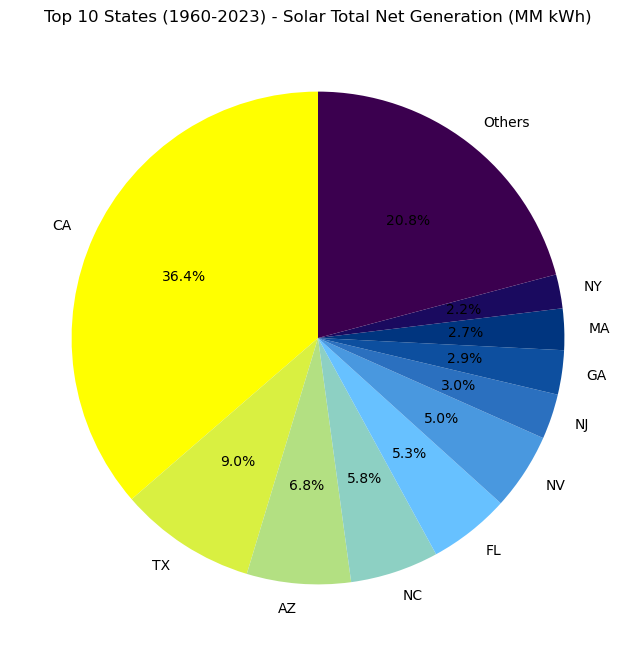

In [9]:
top_10 = state_vals_sorted.iloc[:10]
others = state_vals_sorted.iloc[10:].sum()
top_10['Others'] = others

plt.figure(figsize=(8, 8))
top_10.plot(
    kind='pie', autopct='%1.1f%%', startangle=90, 
    labels=top_10.index, colors=['#FFFF00', '#D9F041', '#B3E082', '#8DD0C3', '#67C1FF', '#4998DF', '#2B70BF', '#0D4F9F', '#00357F', '#1A0A5F', '#3B004F']
)
plt.title('Top 10 States (1960-2023) - Solar Total Net Generation (MM kWh)')
plt.ylabel('')
plt.savefig('top_solar_states.png')
plt.show()

In [10]:
# Wind Energy filtered dataframe
wind_df = EIA_renewable[EIA_renewable['seriesId'] == 'WYTCP']
state_vals_2 = wind_df.groupby('stateId')['value'].sum()
state_vals_sorted_2 = state_vals_2.sort_values(ascending=False)
state_vals_sorted_2.drop('US', inplace=True)

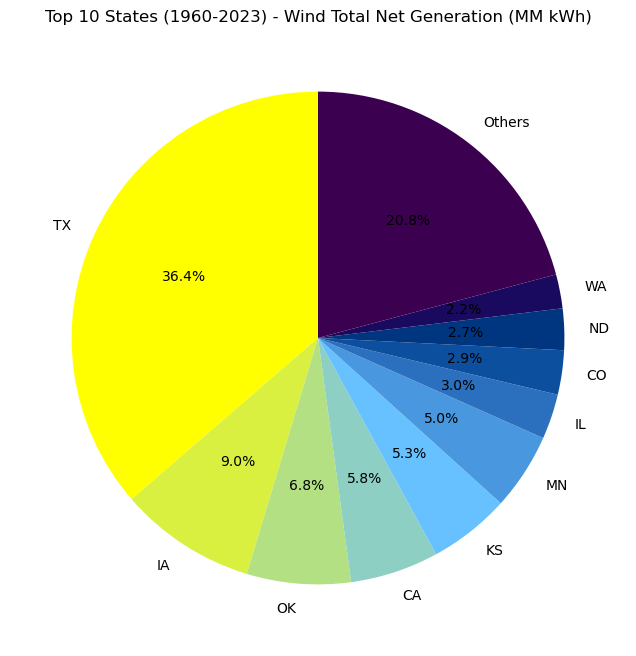

In [11]:
# Selecting the top 10 states after sorting by descending order
top_10_2 = state_vals_sorted_2.iloc[:10]
others_2 = state_vals_sorted_2.iloc[10:].sum()
top_10_2['Others'] = others_2

# Creating the graph
plt.figure(figsize=(8, 8))
top_10.plot(
    kind='pie', autopct='%1.1f%%', startangle=90, 
    labels=top_10_2.index, colors=['#FFFF00', '#D9F041', '#B3E082', '#8DD0C3', '#67C1FF', '#4998DF', '#2B70BF', '#0D4F9F', '#00357F', '#1A0A5F', '#3B004F']
)
plt.title('Top 10 States (1960-2023) - Wind Total Net Generation (MM kWh)')
plt.ylabel('')
plt.savefig('top_wind_states.png')
plt.show()

In [12]:
# Solar Energy Geopandas Graph
solar_df_2 = EIA_renewable[(EIA_renewable['seriesId'] == 'SOTGP') & 
                         (EIA_renewable['period'] >= 2013) & 
                         (EIA_renewable['period'] <= 2023)] # Grabbing values for this 10-year period

# Limiting to just the state IDs and the total value over 10 years
state_vals_2 = solar_df_2.groupby('stateId')['value'].sum()
state_vals_2.drop('US', inplace=True)

In [13]:
# Merging the TIGER/Line Shapefilea data from the US Census with our filtered EIA data
os.environ['GDAL_DATA'] = r"C:\Users\Mina\anaconda3\Library\share\gdal"
gdf = gpd.read_file(os.getcwd()+'/tl_2023_us_state')
gdf = gdf.merge(state_vals_2, left_on='STUSPS', right_on='stateId', how='left')

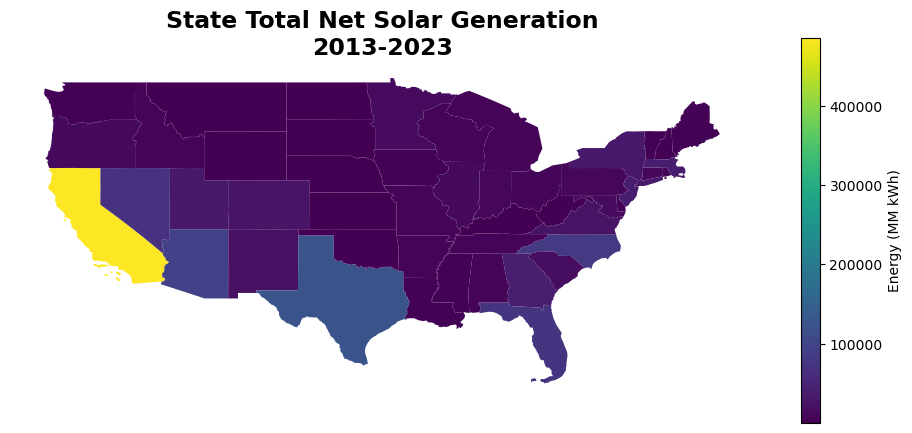

In [14]:
# Filtering out Alaska and Hawaii for a cleaner graph
continental_us = gdf[~gdf['STUSPS'].isin(['AK', 'HI'])]
# Creating the graph
fig, ax = plt.subplots(figsize=(12, 5))
ax.axis('off')
plot = continental_us.plot(column='value', ax=ax, legend=True, cmap='viridis', legend_kwds={'label': "Energy (MM kWh)"})
ax.set_title('State Total Net Solar Generation\n2013-2023', fontdict={'fontsize': 17, 'fontweight': 'bold'})
plt.savefig('map_solar_states.png')
plt.show()

In [15]:
# Wind Energy Geopandas Graph
wind_df = EIA_renewable[(EIA_renewable['seriesId'] == 'WYTCP') & 
                         (EIA_renewable['period'] >= 2013) & 
                         (EIA_renewable['period'] <= 2023)]

state_vals_3 = wind_df.groupby('stateId')['value'].sum()
state_vals_3.drop('US', inplace=True)

In [16]:
os.environ['GDAL_DATA'] = r"C:\Users\Mina\anaconda3\Library\share\gdal"
gdf_2 = gpd.read_file(os.getcwd()+'/tl_2023_us_state')
gdf_2 = gdf_2.merge(state_vals_3, left_on='STUSPS', right_on='stateId', how='left')

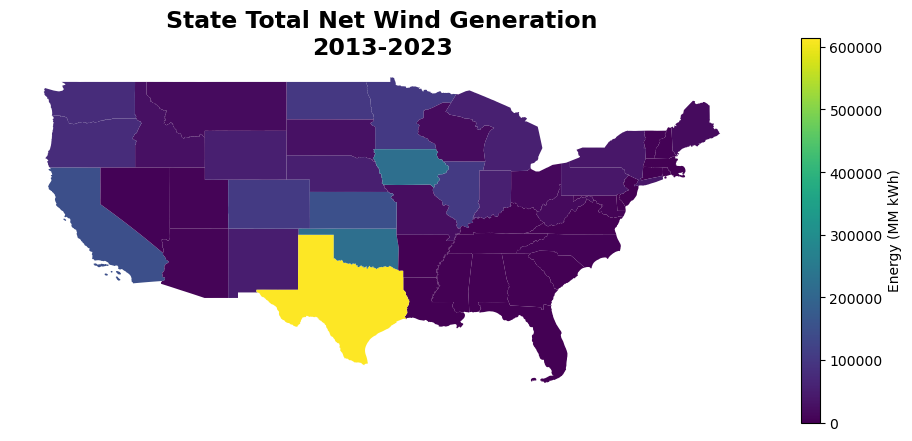

In [17]:
continental_us_2 = gdf_2[~gdf_2['STUSPS'].isin(['AK', 'HI'])]
fig, ax = plt.subplots(figsize=(12, 5))
ax.axis('off')
plot = continental_us_2.plot(column='value', ax=ax, legend=True, cmap='viridis', legend_kwds={'label': "Energy (MM kWh)"})
ax.set_title('State Total Net Wind Generation\n2013-2023', fontdict={'fontsize': 17, 'fontweight': 'bold'})
plt.savefig('map_wind_states.png')
plt.show()

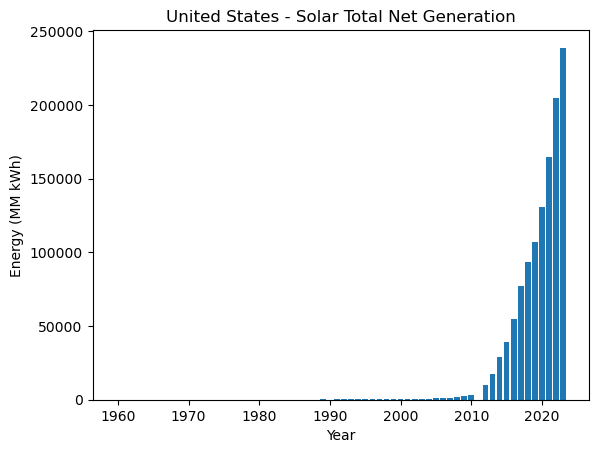

In [28]:
# US Total Solar Graph
us_solar_df = EIA_renewable[EIA_renewable['seriesId'] == 'SOTGP']
us_solar_values = us_solar_df[us_solar_df['stateId'] == 'US']

plt.bar(us_solar_values['period'], us_solar_values['value'])

plt.xlabel('Year')
plt.ylabel('Energy (MM kWh)')
plt.title('United States - Solar Total Net Generation')
plt.savefig('us_solar_total.png', bbox_inches='tight')
plt.show()

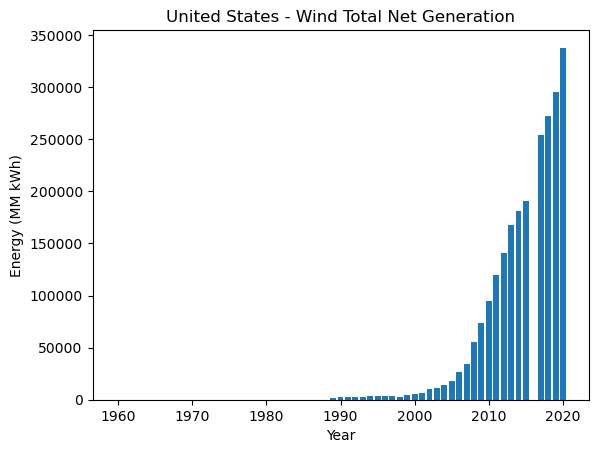

In [29]:
# US Total Wind Graph
us_wind_df = EIA_renewable[EIA_renewable['seriesId'] == 'WYTCP']
us_wind_values = us_wind_df[us_wind_df['stateId'] == 'US']

plt.bar(us_wind_values['period'], us_wind_values['value'])

plt.xlabel('Year')
plt.ylabel('Energy (MM kWh)')
plt.title('United States - Wind Total Net Generation')
plt.savefig('us_wind_total.png', bbox_inches='tight')
plt.show()

<hr>

#### Getting the Extreme Weather data

#### Visualizing the Extreme Weather data